## Problem: Visualizing and Summarizing Email Content

In this problem, we will use a variety of tools to visualize and identify similarities in emails.  We will consider textual data from emails sent from employees at Enron. Enron was the sixth largest energy company in the world, before they collasped and the majority of their executives were tried for fraud after overstating the company's earnings by several hundred million dollars.  This dataset is often used by researchers who are interested in "improving current email tools, or understanding how email is currently used" because "it is the only substantial collection of "real" email that is public" (https://www.cs.cmu.edu/~enron/). 

 #### Data Description:
The format of the enron_sample.txt file is: 

---
docID wordID count  
docID wordID count   
...  
docID wordID count   
docID wordID count  

---

There are 1000 documents (emails) in this sample.  Individual document names (i.e. a identifier for each docID) are not provided for copyright reasons. 

The format of the enron_sample_vocab.txt file is wordID = n.  That is, if "apple" is the first word in the vocab file, then the wordID for "apple" is 0.  

We have done much of the necessary pre-processing of this data to save you time.  Please run the code below to load the data.  The enron_sample.txt and enron_sample_vocab.txt files should be in the same folder as your notebook.  The pre-processing code below should take less than 30 seconds to run.

In [1]:
%%time
#Import and pre-process the data
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Read in the sparse matrix representation of the document-word count matrix
enron_file = open("enron_sample.txt", "r") 
enron_file = enron_file.readlines()

all_doc_ids = []
all_word_ids = []
all_counts = []
for l in range(0,len(enron_file)):
    l_text = enron_file[l].rstrip()
    [l_doc, l_word, l_count] = l_text.split(",")
    l_doc = int(l_doc) 
    l_word = int(l_word) 
    all_doc_ids.append(l_doc)
    all_word_ids.append(l_word)
    all_counts.append(int(l_count))
row = np.array(all_doc_ids)
col = np.array(all_word_ids)
counts = np.array(all_counts)  

num_documents = len(set(all_doc_ids))
num_words = len(set(all_word_ids))

#Convert to a dense document-word count matrix where the (ith, jth) entry gives the count of the jth word in the ith document
import scipy.sparse
X = scipy.sparse.csc_matrix((counts, (row,col)),shape=(num_documents,num_words))
X_dense = X.todense()

#Read in the word names  
word_names = open("enron_vocab_sample.txt", "r")
word_names = word_names.readlines()
word_names = [word_names[x] for x in range(0,num_words)]
word_names = [x.rstrip() for x in word_names]

CPU times: user 762 ms, sys: 309 ms, total: 1.07 s
Wall time: 1.8 s


### Part A 
Please report the 10 most common words in the corpus.  To do this, count the number of times
each word appears in the corpus and build a frequency table. 
(In particular, use counts as the "frequency"--do not divide by the total number of words in the corpus.)
Sort the table and print the top 10 most frequent words, along with their frequencies and ranks.  

Hint: You do not need to load nlp for this question.  Our code for this question ran in less than 10 seconds.

In [12]:
a = X_dense.sum(axis=0).tolist()[0]

In [14]:
%%time
#Please write your code here
indices = np.argsort(a)[::-1]    
# same sorting code as before
print('Rank'.ljust(5), 'Word'.ljust(10), 'Count')
for rank, idx in enumerate(indices[:10]):
    print(str(rank + 1).ljust(5), word_names[idx].ljust(10), a[idx])

Rank  Word       Count
1     company    936
2     power      924
3     energy     578
4     market     571
5     california 540
6     business   462
7     firm       443
8     plan       431
9     group      413
10    price      411
CPU times: user 3.47 ms, sys: 1.36 ms, total: 4.83 ms
Wall time: 5.92 ms


### Part B
Now, use the `TfidfTransformer` class in `scikit-learn` to transform this data.  Then, use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the transformed sample data.  Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps). Please set the random_state to 95865 when running LDA. Print the top 5 words associated with each topic.  

Our code ran in less than 2 minutes for this section.   

In [15]:
%%time
#Take random sample of the data


#Create tf-idf matrix
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfTransformer()
X_transform = vectorizer.fit_transform(X_dense) 

#Learn LDA model
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, max_iter=10, n_jobs=-1, random_state=95865)

lda.fit(X_transform)

CPU times: user 2.3 s, sys: 1.01 s, total: 3.31 s
Wall time: 8.5 s


In [19]:
for idx, topic in enumerate(lda.components_):
    print(topic)

[0.10000002 0.10000001 0.10000001 ... 0.10000009 0.10000002 0.10000001]
[0.10000002 0.10000001 0.10058075 ... 0.10000008 0.10000002 0.10000001]
[0.1004537  0.10060479 0.10046582 ... 0.11414565 0.10095089 0.10022532]
[0.10000002 0.10000001 0.10000001 ... 0.10027963 0.10000002 0.10000001]
[0.10000002 0.10002249 0.10028471 ... 0.10000008 0.10000002 0.10000001]
[0.10041715 0.10031689 0.10000001 ... 0.10000008 0.10217828 0.10000001]
[0.11049133 0.10000001 0.10097317 ... 0.10000009 0.10000002 0.10000001]
[0.10017831 0.16812746 0.26053058 ... 0.11033949 0.16711775 0.1       ]
[0.10000002 0.10000001 0.10000001 ... 0.10000011 0.10000002 0.25668149]
[0.10000002 0.10000001 0.10000001 ... 0.10000009 0.10000002 0.10000001]


In [16]:
#Print top words associated with each topic
import numpy as np
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_])
num_top_words = 5

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

import numpy as np
for topic_idx in range(10):
    print('[Topic %d]' % topic_idx)
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print('%s: %f' % (word_names[word_idx], topic_word_distributions[topic_idx, word_idx]))
    print()

Displaying the top 5 words per topic and their probabilities within the topic...

[Topic 0]
description: 0.001596
central: 0.001521
detailed: 0.001507
mtg: 0.001349
conference_room: 0.001345

[Topic 1]
status: 0.001788
report: 0.001553
amount: 0.001226
iep: 0.001047
changed: 0.001046

[Topic 2]
meeting: 0.003240
attached: 0.002484
power: 0.002439
market: 0.002264
california: 0.001928

[Topic 3]
lynn: 0.001069
chart: 0.000826
tonight: 0.000780
posted: 0.000628
waiver: 0.000622

[Topic 4]
longhorn: 0.001589
texas: 0.001114
wholesale: 0.000957
cancelled: 0.000921
true_orange: 0.000894

[Topic 5]
fantasy: 0.001156
roundtrip: 0.001099
yahoo: 0.000942
chase: 0.000879
ref: 0.000809

[Topic 6]
daily: 0.001265
affiliates: 0.001128
affiliate: 0.001107
estoppel: 0.001069
enforceable: 0.001069

[Topic 7]
final: 0.001856
online: 0.001682
hourahead: 0.001472
messages: 0.001330
percent: 0.001163

[Topic 8]
fwd: 0.000560
wine: 0.000559
laura: 0.000494
emailthis: 0.000492
isare: 0.000492

[Topic 9]
ipa

### Part C 
Please write a few sentences to interpret the results of your topic modeling.  What do the various clusters seem to represent? 
Do they appear to be meaningful email categories for an energy company?

#### Here, please write your interpretation:


### Part D 
Please use t-SNE and the probability distribution of documents over topics to find a 2-D representation of the email documents. 
That is, please run t-SNE on the documents' distributions over topics, which is an output of your LDA model. When running t-SNE, set the angle to 0.5, the learning rate to 800, and init to 'PCA'.

Our code ran in less than 30 seconds for this section.

In [21]:
%%time
#Find 2D represenation of the email documents
x_dis = lda.transform(X_transform)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, angle=0.5,learning_rate=800, init='pca', random_state=95865)
x_2d_tsne = tsne.fit_transform(x_dis)


CPU times: user 6.44 s, sys: 624 ms, total: 7.07 s
Wall time: 9.6 s


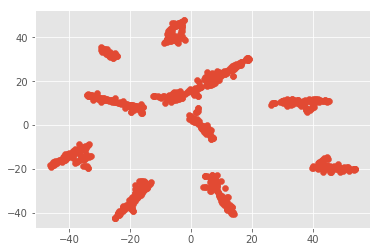

In [26]:
plt.scatter(x_2d_tsne[:,0], x_2d_tsne[:,1])

### Part E 
Use DP means to pick the number of clusters in your 2-D representation, assuming that you are only interested in clusters with probability of at least .05. Set the number of mixture components to 20, the weight concentration prior to .1, n_init to 200, and the random state to 95865.  Please print the sorted probability weights you find.

Our code for this section ran in less than 2 minutes.

In [23]:
%%time
#Determine the number of clusters using DP-Means
from sklearn.mixture import BayesianGaussianMixture

dpgmm = BayesianGaussianMixture(n_components=20, weight_concentration_prior=.1, n_init=200, random_state=95865)
dpgmm.fit(x_2d_tsne)

print(np.sort(dpgmm.weights_)[::-1])

[1.81293002e-01 1.12877589e-01 1.09762923e-01 1.07581838e-01
 1.05440240e-01 1.03622419e-01 9.13316734e-02 7.69298391e-02
 7.01150760e-02 4.09492410e-02 8.74180952e-05 7.94709403e-06
 7.22463094e-07 6.56784631e-08 5.97076937e-09 5.42797216e-10
 4.93452014e-11 4.48592740e-12 4.07811582e-13 3.70737802e-14]
CPU times: user 23.1 s, sys: 172 ms, total: 23.3 s
Wall time: 23.6 s


#### Here, please write your choice for the number of clusters given your DP-Means results: 9 clusters


### Part F 
Fit a GMM model with the number of clusters found in part E and visualize the clustering results in a scatter plot. Each document should be represented by its 2-D t-SNE representation and should be color coded according to it's clustering assignment. When running your GMM, set n_init to 200, and the random_state to 95865.

Our code for this section ran in less than 10 seconds.

[0.18402172 0.12       0.112      0.108      0.10694239 0.1049997
 0.103      0.091      0.07003619]
CPU times: user 8.56 s, sys: 63.6 ms, total: 8.63 s
Wall time: 8.71 s


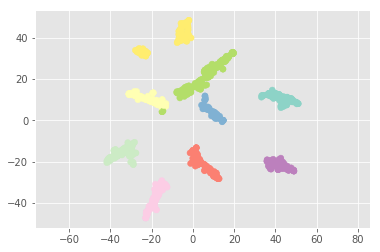

In [24]:
%%time
#Fitting GMM with Number of Clusters Determined By DP-Means
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=9, n_init=200, random_state=95865)
gmm.fit(x_2d_tsne)

print(np.sort(gmm.weights_)[::-1])

gmm_cluster_assignments = gmm.predict(x_2d_tsne)
plt.scatter(x_2d_tsne[:, 0], x_2d_tsne[:, 1], c=gmm_cluster_assignments, cmap='Set3')
plt.axis('equal')

### Part G
Now use sklearn's built-in CH-index function to pick the number of clusters.  To do this you should load metrics from `sklearn` and then use the `calinski_harabaz_score` function.  For more details on this function see: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html 

You should use a for loop to run k-means for values of k = [2, 5, 10, 20, 30] over your 2-D t-SNE representation of the data.  When running k-means, set n_init to 1000 and random_state to 95865. Please record the CH-index for each k, and plot the results.  Indicate if you would select k to be 2, 5, 10, 20 or 30 given these results. 

Our code for this section ran in under 1 minute 15 seconds.

In [ ]:
%%time
#Determine Number of Clusters with k-means and CH-Index
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import KMeans

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None
kidx = [2,5,10,20,30]
scores = []
for k in kidx:
    candidate_gmm = KMeans(n_clusters=k, n_init=1000, random_state=95865)
    candidate_gmm.fit(x_2d_tsne)
    cluster_assignments = candidate_gmm.predict(x_2d_tsne)
    score = calinski_harabaz_score(x_2d_tsne, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    scores.append(score)
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

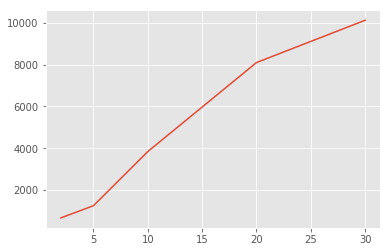

In [28]:
plt.plot(kidx, scores)

#### Here, please write your choice for the number of clusters based on your analysis using k-means and the CH-Index:


### Part H
Fit k-means with the number of clusters found in part E and visualize the clustering results in a scatter plot. 
Each document should be represented by its 2-D t-SNE representation and should be color coded according to it's clustering assignment.

Then, write a few sentences explaining your results from part G and from this clustering visualization.  Are the clusters found by k-means good? Why might you have gotten these results?  

CPU times: user 16 s, sys: 114 ms, total: 16.1 s
Wall time: 16.5 s


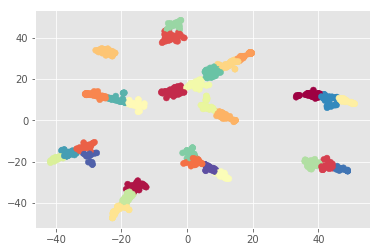

In [30]:
%%time
#Please write your code here
candidate_gmm = KMeans(n_clusters=30, n_init=1000, random_state=95865)
candidate_gmm.fit(x_2d_tsne)
cluster_assignments = candidate_gmm.predict(x_2d_tsne)
plt.scatter(x_2d_tsne[:, 0], x_2d_tsne[:, 1],
            c=cluster_assignments, cmap='Spectral')

#### Here, please write a few sentences to explain your results:
